<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/Chapter_7_SAE_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.1 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Open loop TF G(s) =  
        100 s^2 + 5000 s + 6e+04
----------------------------------------
s^5 + 110 s^4 + 3875 s^3 + 4.375e+04 s^2

Closed loop TF =  
                100 s^2 + 5000 s + 6e+04
---------------------------------------------------------
s^5 + 110 s^4 + 3875 s^3 + 4.385e+04 s^2 + 5000 s + 6e+04

Poles =  [-5.00637426e+01+0.j         -3.49594750e+01+0.j
 -2.49840155e+01+0.j          3.61652952e-03+1.17138141j
  3.61652952e-03-1.17138141j]
Zeros =  [-30.+0.j -20.+0.j]


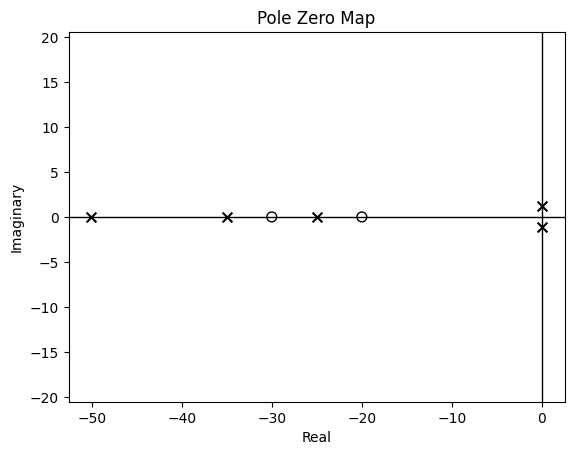

In [3]:
# Define your transfer open-loop transfer function:
#G(s) = 100(s+20)(s+30) / s^2(s+25)(s+35)(s+50)

# Coefficients of the numerator
num = np.polymul([0,100], np.polymul([1, 20],[1,30]))
# Coefficients of the denominator
den = np.polymul(np.polymul([1,0,0],[1,25]), np.polymul([1, 35],[1,50]))

G = tf(num,den)
print("Open loop TF G(s) = ", G)

# closed loop TF
TF = feedback(G, 1)
print("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

Text(0.5, 0, 't [sec.]')

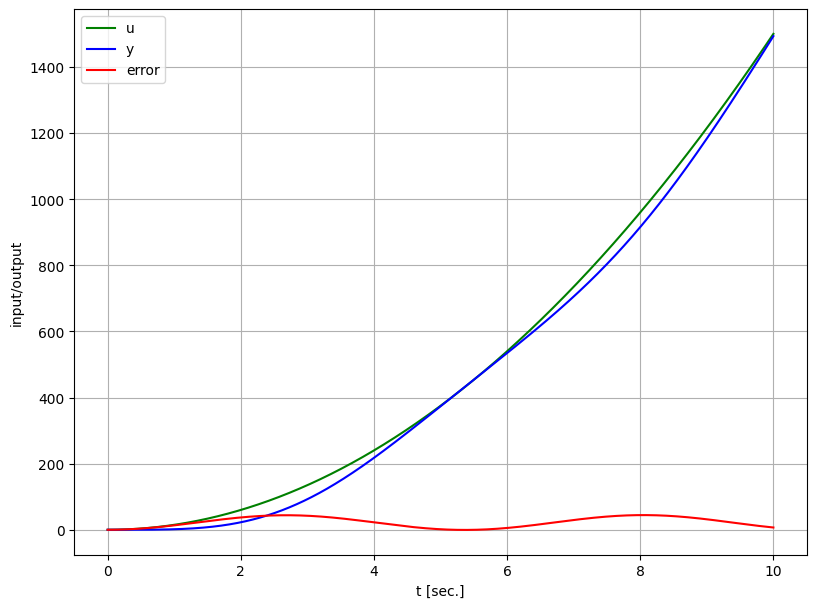

In [7]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 10
dt = 0.0001
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

#r = 15 * np.ones(nt)
#r = 15 * t
r = 15 * t**2

# Simulation :
(t, y) = forced_response(TF, T=t, U=r, X0=0)

error = r - y

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, r, "green")
plt.plot(t, y, "blue")
plt.plot(t, error, "red")
plt.grid()

plt.legend(labels =("u", "y", "error"))

plt.ylabel("input/output")
plt.xlabel("t [sec.]")